In [1]:
import pandas as pd
import geopandas as gpd 
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
data311 = pd.read_csv('311_Oct2022.csv') 

In [3]:
gdf311 = gpd.GeoDataFrame(
    data311, geometry=gpd.points_from_xy(data311.Longitude, data311.Latitude))

In [4]:
data311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,geometry
0,55567159,10/01/2022 12:00:02 AM,10/01/2022 12:50:48 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11373.0,92-12 51 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.740168,-73.871010,"(40.74016778489613, -73.87100960840758)",POINT (-73.87101 40.74017)
1,55571180,10/01/2022 12:00:06 AM,10/01/2022 01:20:13 AM,NYPD,New York City Police Department,Non-Emergency Police Matter,Trespassing,Residential Building/House,10016.0,630 1 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.745155,-73.972500,"(40.745155331165606, -73.97250020902688)",POINT (-73.97250 40.74516)
2,55565058,10/01/2022 12:00:22 AM,10/01/2022 02:32:27 AM,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,10040.0,141 NAGLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.861031,-73.926276,"(40.86103107825989, -73.92627553723854)",POINT (-73.92628 40.86103)
3,55568259,10/01/2022 12:00:30 AM,10/01/2022 12:53:05 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11103.0,42-18 31 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.760454,-73.915276,"(40.76045412454783, -73.91527612392564)",POINT (-73.91528 40.76045)
4,55567523,10/01/2022 12:00:54 AM,10/01/2022 05:01:12 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11369.0,32-04 86 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.757732,-73.881985,"(40.7577322343659, -73.88198481783013)",POINT (-73.88198 40.75773)


In [5]:
data311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'geometry'],
      dtype='object')

In [6]:
borough =data311.Borough.unique().tolist()

In [7]:
agencyl = data311['Agency Name'].unique().tolist()

In [8]:
agencyl 

['New York City Police Department',
 'Department of Environmental Protection',
 'Department of Homeless Services',
 'Department of Health and Mental Hygiene',
 'Department of Buildings',
 'Department of Transportation',
 'Taxi and Limousine Commission',
 'Department of Sanitation',
 'Department of Housing Preservation and Development',
 'Department of Consumer Affairs',
 'Department of Parks and Recreation',
 'Department of Education',
 'Economic Development Corporation',
 'Office of Technology and Innovation']

In [9]:
print (agencyl[3])
print(borough)

Department of Health and Mental Hygiene
['QUEENS', 'MANHATTAN', 'BROOKLYN', 'BRONX', 'STATEN ISLAND', 'Unspecified']


<AxesSubplot:>

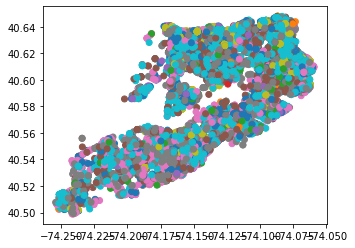

In [10]:
gdf311.loc[gdf311.Borough==borough[4]].plot(column='Agency')

In [11]:
def plot_borough(gdf, boroughn):
    gdf.loc[gdf.Borough==boroughn].plot(column='Agency',cmap='Pastel1',figsize=(10,8))
    plt.axis('off')
    plt.title(boroughn+'311 map')
    plt.grid('on')
    plt.show()
    
    

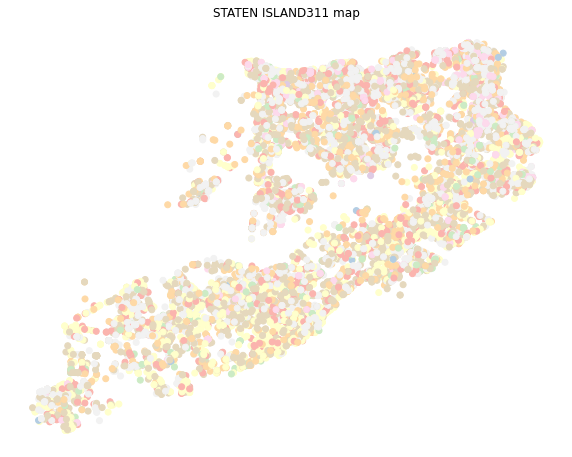

In [12]:
plot_borough(gdf311 ,borough[4])

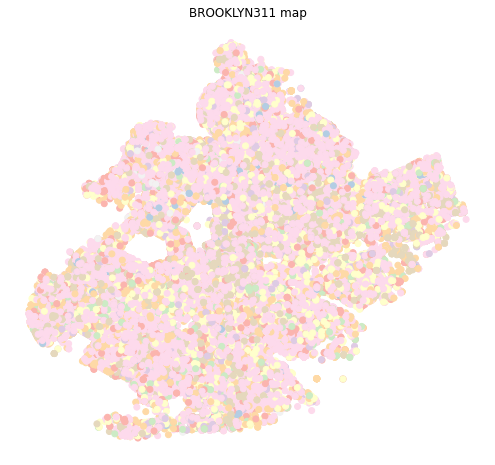

In [13]:
plot_borough(gdf311 ,borough[2])

In [14]:
def plot_agency(gdf, boroughn,agency):
    gdf.loc[(gdf.Borough==boroughn)&(gdf['Agency Name']==agency)].plot(column='Descriptor',cmap='tab20c',figsize=(15,20),legend=True,alpha=0.6)
    plt.axis('off')
    plt.title(boroughn+' '+agency+'311 map')
    plt.grid('on')
    plt.show()
    
    

In [15]:
agencyl[1]

'Department of Environmental Protection'

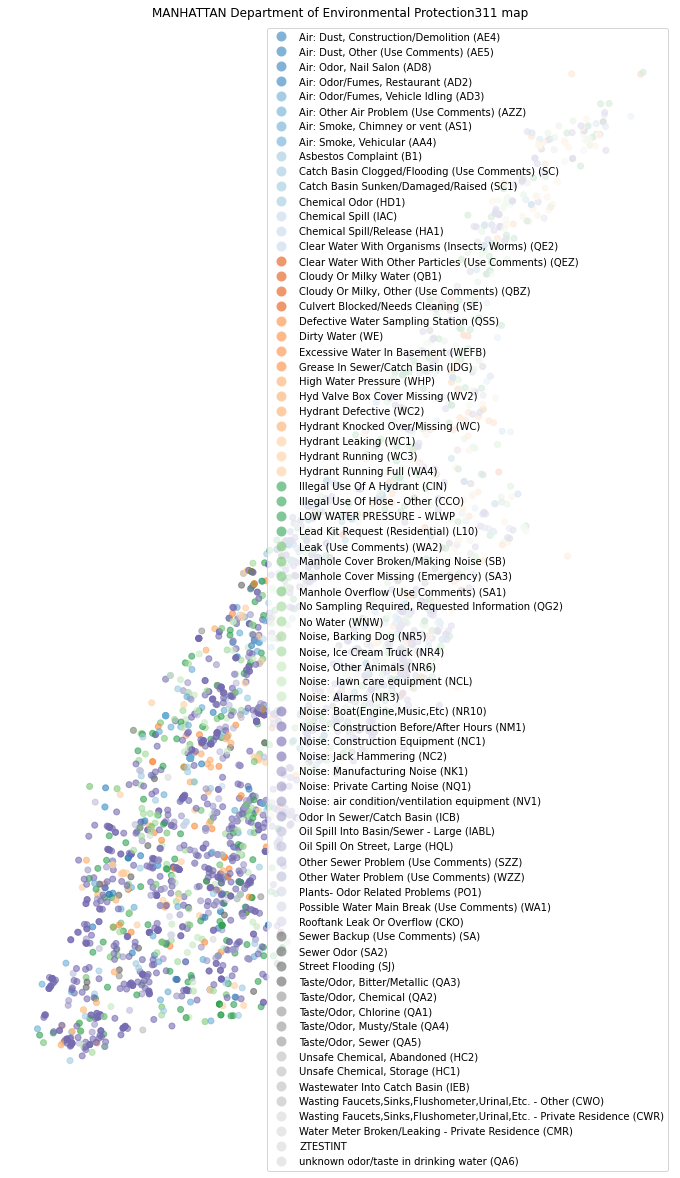

In [16]:
plot_agency(gdf311,borough[1],agencyl[1])

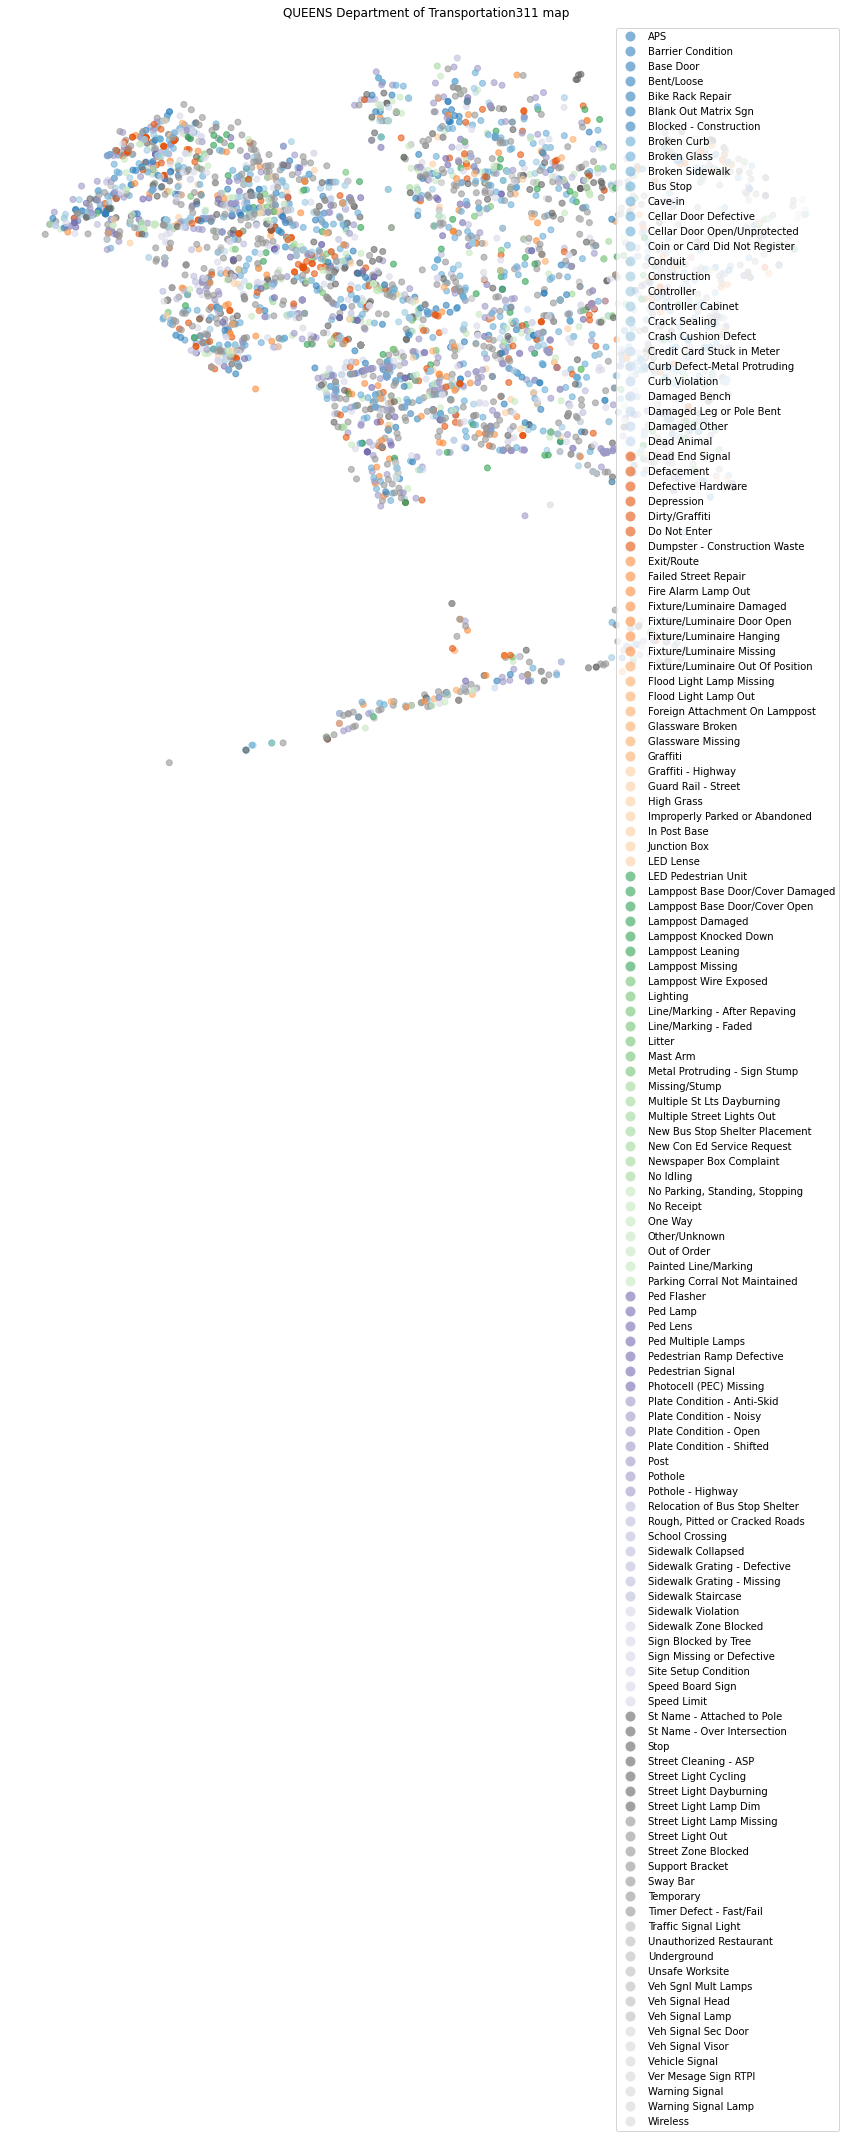

In [17]:
plot_agency(gdf311,borough[0],agencyl[5])

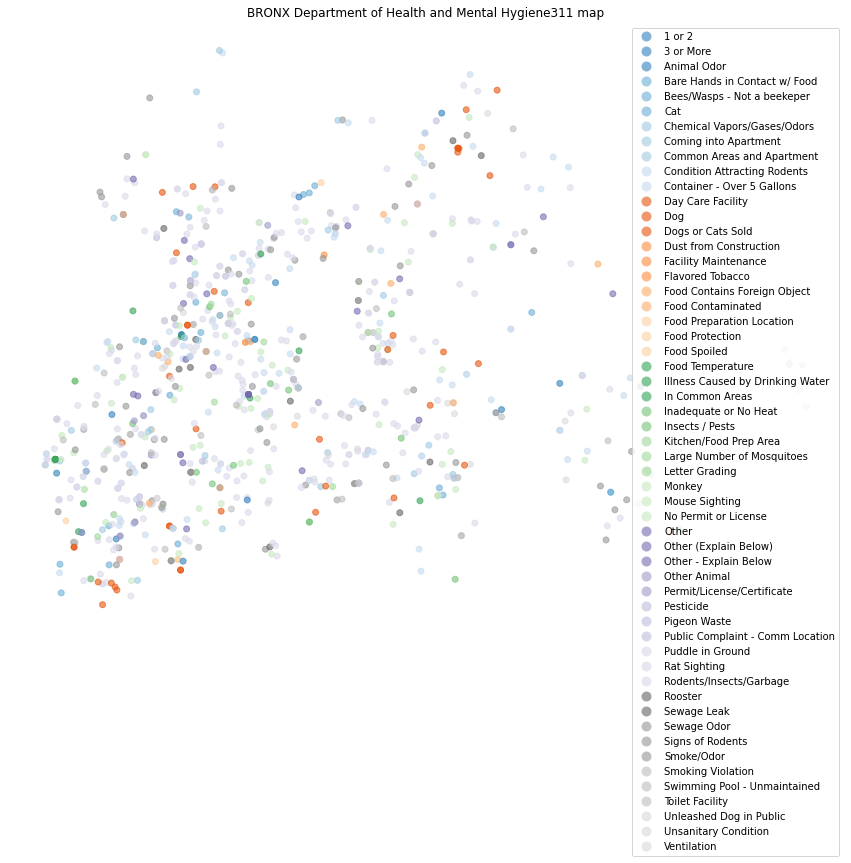

In [18]:
plot_agency(gdf311,borough[3],agencyl[3])

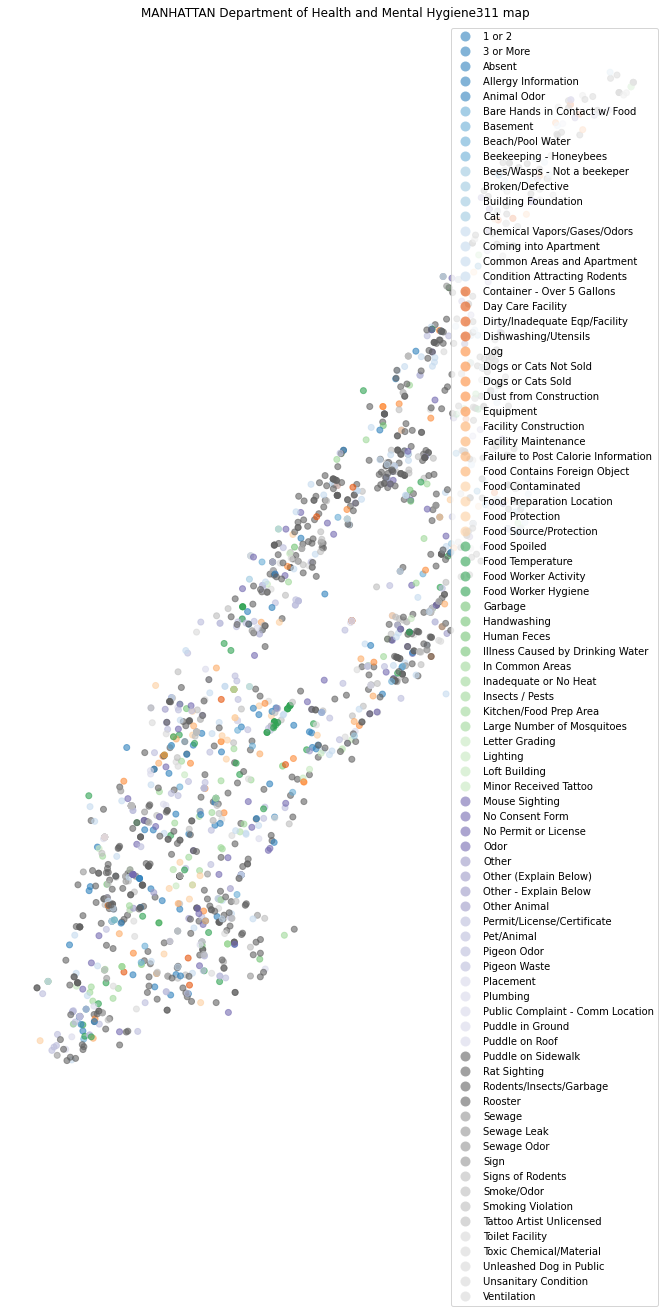

In [19]:
plot_agency(gdf311,borough[1],agencyl[3])